# Observations

##### 1. There was an expectedly clear correlation between latitude and temperatures in the city sample.
##### 2. The range of humidity observations in the sample showed a more even distribution of humidity 
#####     percentages in northern latitudes, while there was a marked concentration of high humidities 
#####    between southern latitudes -40* to 0*.
##### 3. There was no relationship between latitude and cloudiness observed in the sample.
##### 4. Sample data of wind speed observations showed skewed distribution of outliers as latitudes
#####     approach the poles. Sample suggests a relationship between latitudes approaching the 
#####     poles and wind speeds.


In [ ]:
#Query 
# api.openweathermap.org/data/2.5/find?q={cities}&units=imperial

In [ ]:
!pip install citipy
!pip install RateLimiter

In [1]:
#Import dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import time
from citipy import citipy
from ratelimiter import RateLimiter
from datetime import datetime

In [2]:
rate_limit = RateLimiter(max_calls=50, period=65)


In [3]:
# Import API key
from api_key import api_key


In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List Using Citipy

In [5]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


569

# Perform API Calls


In [6]:
#Create api_key variable to hold api_key which will be added to end of the URL
api_keys = api_key

In [7]:
#Create URL variable equal to API Call URL + api_key
query = "http://api.openweathermap.org/data/2.5/weather?&appid=" + api_key + "&units=imperial&q="

In [8]:
#Create list to append information from request.get method
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
lat=[]
lng=[]
city_id=[]
country=[]
city_name=[]
date=[]

#Create print statements for log file
print(f"Retrieving Requested Information")
print(f"----------------------------------")

#Create Counter for API Calls
counter = 1

#Loop through the cities in the city list 
for i, city in enumerate(cities):
    with rate_limit:
        #Create URL variable equal to API Call URL + api_key
        query = "http://api.openweathermap.org/data/2.5/weather?&appid=" + api_key + "&units=imperial&q="
        query_url = query + city

        #Print request notification
        print(f"Processing request for {city}")
        print(f"{query_url}")
        
        # Iterate the counter 
        counter += 1
         
    # Use requests.get method for JSON info and save response to a variable
    # try statement using .append method to place json info into lists 
    #If a city's information is not found, the whole request will simply fail.
    #In order to avoid this, an except statement will be placed following the try's API call
        weather = requests.get(query_url).json()
        
        #Parse JSON weather info into lists
    try:    
        city_id.append(weather["list"]["id"])
    except:
        city_id.append(np.nan)
    try:
        city_name.append(weather["list"]["name"])
    except: 
        city_name.append(city)
    try:
        country.append(weather["sys"]["country"])
    except:
        country.append(np.nan)
    try:
        lat.append(weather["coord"]["lat"])
    except:
        lat.append(np.nan)
    try:
        lng.append(weather["coord"]["lon"])
    except:
        lng.append(np.nan)
    try:
        date.append(weather["dt"])
    except:
        date.append(np.nan)
    try:    
        max_temp.append(weather["main"]["temp_max"])
    except:
        max_temp.append(np.nan)
    try:
        humidity.append(weather["main"]["humidity"])
    except:
        humidity.append(np.nan)
    try:
        wind_speed.append(weather["wind"]["speed"])
    except:
        wind_speed.append(np.nan)  
     # Sometimes it's not cloudy! Then 'clouds' does not exist, so set it to zero.
    try:
        cloudiness.append(weather['clouds']['all'])
    except:
        cloudiness.append(0)
        
    #Append lists into a dictionary
    weather_df = pd.DataFrame({"CityID": city_id,
                             "City Name": city_name,
                             "Country": country,
                             "Latitude": lat,
                             "Longitude": lng,
                             "Temp": max_temp,
                             "Humidity": humidity,
                             "Cloudiness": cloudiness,
                             "Wind Speed": wind_speed
                            })
        # Use time.sleep method to ensure calls do not exceed API request rate limit
    #time.sleep(1)
        
    continue

Retrieving Requested Information
----------------------------------
Processing request for carnarvon
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=carnarvon
Processing request for uruzgan
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=uruzgan
Processing request for rocha
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=rocha
Processing request for ushuaia
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=ushuaia
Processing request for mar del plata
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=mar del plata
Processing request for nadym
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=nadym
Processing request for hit
http://api.openweathermap.org/data/2.5/

Processing request for namatanai
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=namatanai
Processing request for new norfolk
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=new norfolk
Processing request for leningradskiy
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=leningradskiy
Processing request for satitoa
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=satitoa
Processing request for riviere-au-renard
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=riviere-au-renard
Processing request for mahebourg
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=mahebourg
Processing request for privas
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a654

Processing request for inongo
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=inongo
Processing request for mataura
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=mataura
Processing request for winnemucca
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=winnemucca
Processing request for nizhneyansk
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=nizhneyansk
Processing request for ust-nera
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=ust-nera
Processing request for yellowknife
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=yellowknife
Processing request for bengkulu
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&u

Processing request for ossipee
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=ossipee
Processing request for aginskoye
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=aginskoye
Processing request for avera
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=avera
Processing request for koshurnikovo
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=koshurnikovo
Processing request for boulder city
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=boulder city
Processing request for awbari
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=awbari
Processing request for nikolskoye
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&uni

Processing request for borlange
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=borlange
Processing request for umzimvubu
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=umzimvubu
Processing request for karratha
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=karratha
Processing request for yumbing
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=yumbing
Processing request for volot
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=volot
Processing request for barentsburg
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=barentsburg
Processing request for sassandra
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=impe

Processing request for safaga
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=safaga
Processing request for haibowan
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=haibowan
Processing request for ilhabela
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=ilhabela
Processing request for yinchuan
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=yinchuan
Processing request for sao joao da barra
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=sao joao da barra
Processing request for adre
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=adre
Processing request for kuusamo
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=

Processing request for nuuk
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=nuuk
Processing request for bulgan
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=bulgan
Processing request for jizan
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=jizan
Processing request for tabas
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=tabas
Processing request for pascagoula
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=pascagoula
Processing request for manado
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=manado
Processing request for hegang
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=hegang
Processing re

Processing request for abha
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=abha
Processing request for viligili
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=viligili
Processing request for kristianstad
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=kristianstad
Processing request for zhezkazgan
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=zhezkazgan
Processing request for amapa
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=amapa
Processing request for varna
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=varna
Processing request for kologriv
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=ko

Processing request for pimentel
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=pimentel
Processing request for port-gentil
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=port-gentil
Processing request for mira
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=mira
Processing request for zambezi
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=zambezi
Processing request for odweyne
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=odweyne
Processing request for limon
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=limon
Processing request for jacareacanga
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=ja

Processing request for arklow
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=arklow
Processing request for anau
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=anau
Processing request for mingshui
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=mingshui
Processing request for mumbwa
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=mumbwa
Processing request for quatre cocos
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=quatre cocos
Processing request for aykhal
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=aykhal
Processing request for hayden
http://api.openweathermap.org/data/2.5/weather?&appid=5fec51a6548b5c6dca3233c752b5d63b&units=imperial&q=hayden
P

# Clean Up The Data We Just Gathered!

In [9]:
#Take a look at the data just gathered
weather_df.head(25)

,CityID,City Name,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,NaN,carnarvon,ZA,-30.97,22.13,60.16,40.0,0,8.66
1,NaN,uruzgan,AF,32.93,66.63,64.84,23.0,13,6.33
2,NaN,rocha,UY,-34.48,-54.34,51.52,89.0,0,3.24
3,NaN,ushuaia,AR,-54.81,-68.31,41.00,65.0,40,6.93
4,NaN,mar del plata,AR,-46.43,-67.52,48.46,65.0,99,12.44
5,NaN,nadym,RU,65.53,72.51,25.78,89.0,100,9.95
6,NaN,hit,IQ,33.64,42.83,91.12,20.0,0,7.40
7,NaN,port elizabeth,US,39.31,-74.98,50.00,93.0,16,4.70
8,NaN,kapaa,US,22.08,-159.32,80.60,78.0,90,14.99
9,NaN,omboue,GA,-1.57,9.26,82.12,81.0,100,9.48


In [10]:
#checking data types
weather_df.dtypes

CityID        float64
City Name      object
Country        object
Latitude      float64
Longitude     float64
Temp          float64
Humidity      float64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [11]:
#Fill all NaN values with zeros. 
weather_df.fillna(0)

,CityID,City Name,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,0.0,carnarvon,ZA,-30.97,22.13,60.16,40.0,0,8.66
1,0.0,uruzgan,AF,32.93,66.63,64.84,23.0,13,6.33
2,0.0,rocha,UY,-34.48,-54.34,51.52,89.0,0,3.24
3,0.0,ushuaia,AR,-54.81,-68.31,41.00,65.0,40,6.93
4,0.0,mar del plata,AR,-46.43,-67.52,48.46,65.0,99,12.44
5,0.0,nadym,RU,65.53,72.51,25.78,89.0,100,9.95
6,0.0,hit,IQ,33.64,42.83,91.12,20.0,0,7.40
7,0.0,port elizabeth,US,39.31,-74.98,50.00,93.0,16,4.70
8,0.0,kapaa,US,22.08,-159.32,80.60,78.0,90,14.99
9,0.0,omboue,GA,-1.57,9.26,82.12,81.0,100,9.48


In [12]:
#Export cleaned dataframe to a csv file
weather_df.to_csv("weather_info.csv") 

# Data Visualization

In [13]:
weather_df.head()

,CityID,City Name,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,NaN,carnarvon,ZA,-30.97,22.13,60.16,40.0,0,8.66
1,NaN,uruzgan,AF,32.93,66.63,64.84,23.0,13,6.33
2,NaN,rocha,UY,-34.48,-54.34,51.52,89.0,0,3.24
3,NaN,ushuaia,AR,-54.81,-68.31,41.00,65.0,40,6.93
4,NaN,mar del plata,AR,-46.43,-67.52,48.46,65.0,99,12.44


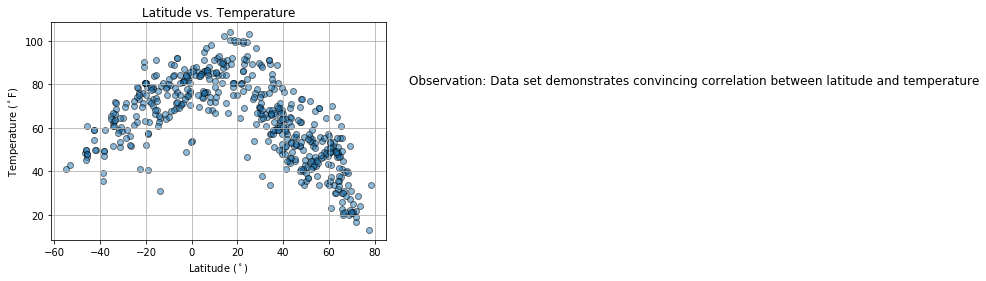

In [36]:
plt.scatter(weather_df["Latitude"], weather_df["Temp"], alpha=.50, edgecolors="k")
plt.title(f"Latitude vs. Temperature")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.text(95, 80, "Observation: Data set demonstrates convincing correlation between latitude and temperature", fontsize=12)
plt.savefig("temp.png")
plt.show()

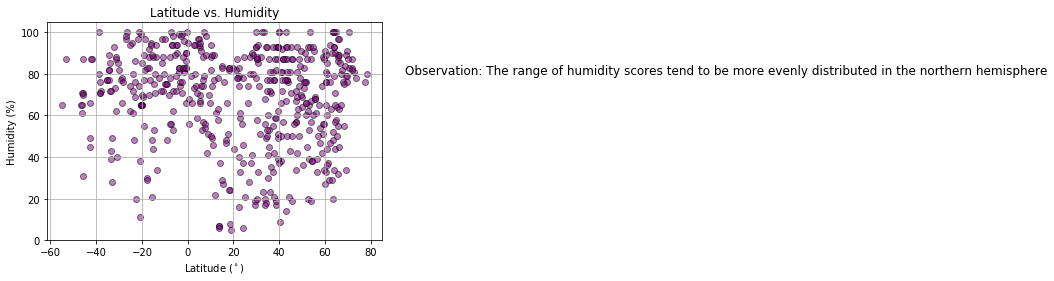

In [32]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], c="purple", alpha=.50, edgecolors="k")
plt.title(f"Latitude vs. Humidity")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.text(95, 80, "Observation: The range of humidity scores tend to be more evenly distributed in the northern hemisphere", fontsize=12)
plt.savefig("humidity.png")
plt.show()

In [19]:
#import seaborn
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


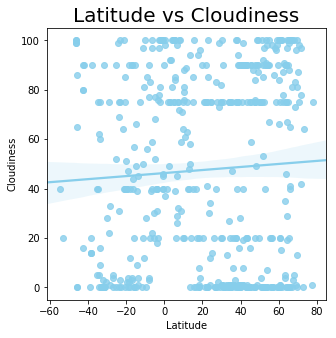

In [24]:
plt.figure(figsize = (5,5))
sns.regplot(x="Latitude", y="Cloudiness", color = 'skyblue', data=weather_df);
plt.title('Latitude vs Cloudiness',size = 20)
plt.savefig('Latitude_vs_Cloudiness.png')

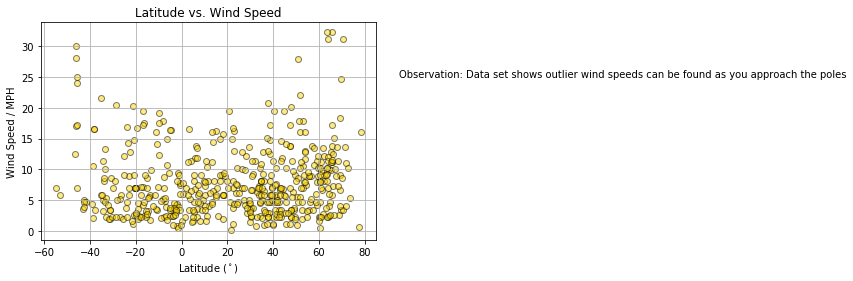

In [35]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], c="gold", alpha=.50, edgecolors="black")
plt.title(f"Latitude vs. Wind Speed")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed / MPH")
plt.grid(True) 
plt.text(95, 25, "Observation: Data set shows outlier wind speeds can be found as you approach the poles", fontsize=10)
plt.savefig("lat_vs_wind.png")
plt.show()